<a href="https://colab.research.google.com/github/Bartup/MIW/blob/main/MIW_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.choice(['ala','ma','kota'], p=[1/3,1/3,1/3])

'kota'

In [ ]:
import matplotlib.pyplot as plt

#Projekt 1
##1. Napisz program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosuj łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu),
##2. Wartość wypłaty: 1 w przypadku wygranej, −1 w przypadku przegranej i 0 w przypadku remisu,
##3. Przeprowadź ciąg kilkudziesięciu gier “kamień, papier, nożyce”. Sporząź wykres jak zmienia się stan kasy w każdym kroku gry.

Enter kamien papier or nozyce: papier
A:  nozyce
B:  papier
Wynik:  a
Wynik a:  1
Wynik b:  -1

Prob nozyce:  0.3833333333333333
Prob kamien:  0.3083333333333333
Prob papier:  0.3083333333333333
Enter kamien papier or nozyce: kamien
A:  nozyce
B:  kamien
Wynik:  b
Wynik a:  0
Wynik b:  0

Prob nozyce:  0.3333333333333333
Prob kamien:  0.3333333333333333
Prob papier:  0.3333333333333333
Enter kamien papier or nozyce: papier
A:  kamien
B:  papier
Wynik:  a
Wynik a:  1
Wynik b:  -1

Prob nozyce:  0.3083333333333333
Prob kamien:  0.3833333333333333
Prob papier:  0.3083333333333333
Enter kamien papier or nozyce: nozyce
A:  papier
B:  nozyce
Wynik:  b
Wynik a:  0
Wynik b:  0

Prob nozyce:  0.3333333333333333
Prob kamien:  0.4083333333333333
Prob papier:  0.2583333333333333
Enter kamien papier or nozyce: kamien
A:  kamien
B:  kamien
Wynik:  remis
Wynik a:  0
Wynik b:  0

Prob nozyce:  0.3333333333333333
Prob kamien:  0.4083333333333333
Prob papier:  0.2583333333333333
Historia A:  [0, 1, 0, 1

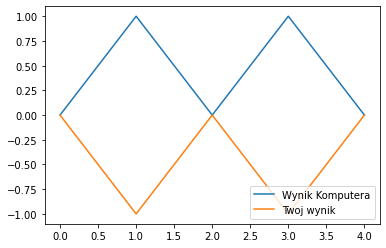

In [ ]:
kamien_prob = 1/3
papier_prob = 1/3
nozyce_prob = 1/3

historia_a = [0]
historia_b = [0]

konto_a = 0
konto_b = 0

def kto_wygral(symbol_a, symbol_b):
  if (symbol_a == 'kamien'):
    if (symbol_b == 'kamien'):
      return 'remis'
    if symbol_b == 'papier':
      return 'a'
    if symbol_b == 'nozyce':
      return 'b'

  if (symbol_a == 'papier'):
    if (symbol_b == 'kamien'):
      return 'a'
    if symbol_b == 'papier':
      return 'remis'
    if symbol_b == 'nozyce':
      return 'b'

  if (symbol_a == 'nozyce'):
    if (symbol_b == 'kamien'):
      return 'b'
    if symbol_b == 'papier':
      return 'a'
    if symbol_b == 'nozyce':
      return 'remis'

for n in range(5):
  symbol_a = np.random.choice(['kamien', 'papier', 'nozyce'], p=[kamien_prob, papier_prob, nozyce_prob])
  symbol_b = input('Enter kamien papier or nozyce: ')

  print('A: ', symbol_a)
  print('B: ', symbol_b)

  wynik = kto_wygral(symbol_a, symbol_b)
  print('Wynik: ', wynik)

  if wynik == 'a':
    konto_a = konto_a + 1
    konto_b = konto_b - 1
    historia_b.append(konto_b)
    historia_a.append(konto_a)
    if symbol_a == 'kamien':
      kamien_prob = kamien_prob + 0.05
      papier_prob = papier_prob - 0.025
      nozyce_prob = nozyce_prob - 0.025
    if symbol_a == 'nozyce':
      kamien_prob = kamien_prob - 0.025
      papier_prob = papier_prob - 0.025
      nozyce_prob = nozyce_prob + 0.05
    if symbol_a == 'papier':
      kamien_prob = kamien_prob - 0.025
      papier_prob = papier_prob + 0.05
      nozyce_prob = nozyce_prob - 0.025
  if wynik == 'b':
    konto_a = konto_a - 1
    konto_b = konto_b + 1
    historia_b.append(konto_b)
    historia_a.append(konto_a)
    if symbol_a == 'kamien':
      kamien_prob = kamien_prob - 0.05
      papier_prob = papier_prob + 0.025
      nozyce_prob = nozyce_prob + 0.025
    if symbol_a == 'nozyce':
      kamien_prob = kamien_prob + 0.025
      papier_prob = papier_prob + 0.025
      nozyce_prob = nozyce_prob - 0.05
    if symbol_a == 'papier':
      kamien_prob = kamien_prob + 0.025
      papier_prob = papier_prob - 0.05
      nozyce_prob = nozyce_prob + 0.025

  print('Wynik a: ', konto_a)
  print('Wynik b: ', konto_b)
  

  print()
  print('Prob nozyce: ', nozyce_prob)
  print('Prob kamien: ', kamien_prob)
  print('Prob papier: ', papier_prob)


print('Historia A: ', historia_a)
print('Historia B: ', historia_b)

plt_A = np.array(historia_a)
plt_B = np.array(historia_b)

plt.plot(plt_A)
plt.plot(plt_B)
plt.legend(["Wynik Komputera", "Twoj wynik"], loc ="lower right")
plt.show()
  

  